In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Task 1 

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


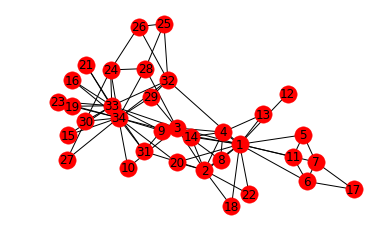

In [2]:
# well, c'mon... load and draw
karate = nx.read_gml('karate/karate.gml', label='id')
plt.subplot(111)
nx.draw(karate, with_labels=True)
plt.show()

# Task 2

In [3]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [4]:
# get data from website
url = 'http://www.kft.pwr.edu.pl/?Publications'
response = requests.get(url)
response

<Response [200]>

In [5]:
# Prepare delicious soup
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
# Get rid of not needed data
publications = list()
for i in range(7, len(soup.findAll('li'))):
    one_li_tag = soup.findAll('li')[i].get_text()
    publications.append(one_li_tag)

In [7]:
# Filter names from data
import re
name_regex = "[A-Z]\.\s[A-Z]\.?\s?[A-Z]?\.?\s?[A-Z]?[a-z]*"
researchers = list()
publications_string = str(publications)
researchers = re.findall(name_regex, publications_string)
known_authors = list()
for researcher in researchers:
    amount = researchers.count(researcher)
    if amount > 30:
        known_authors.append(researcher)
        
single_researchers = list(dict.fromkeys(known_authors))
print(len(single_researchers))
print(single_researchers)

15
['P. Hawrylak', 'M. Mierzejewski', 'G. Pawlik', 'P. Machnikowski', 'K. Roszak', 'K. Sznajd', 'A. Janutka', 'J. Phys', 'J. Misiewicz', 'T. Kuhn', 'A. Wojs', 'A. C. Mitus', 'M. M. Maska', 'J. J. Quinn', 'L. Jacak']


In [8]:
# Add names as nodes
researchers_graph = nx.Graph()
researchers_graph.add_nodes_from(single_researchers)

In [9]:
# Prepare authors as pairs to add edges
for publication in publications:
    author_pairs = list()
    for i in range(len(single_researchers)):
        for ii in range(len(single_researchers)):
            if (i != ii):
                author_pairs.append((single_researchers[i], single_researchers[ii]))
    researchers_graph.add_edges_from(author_pairs)

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


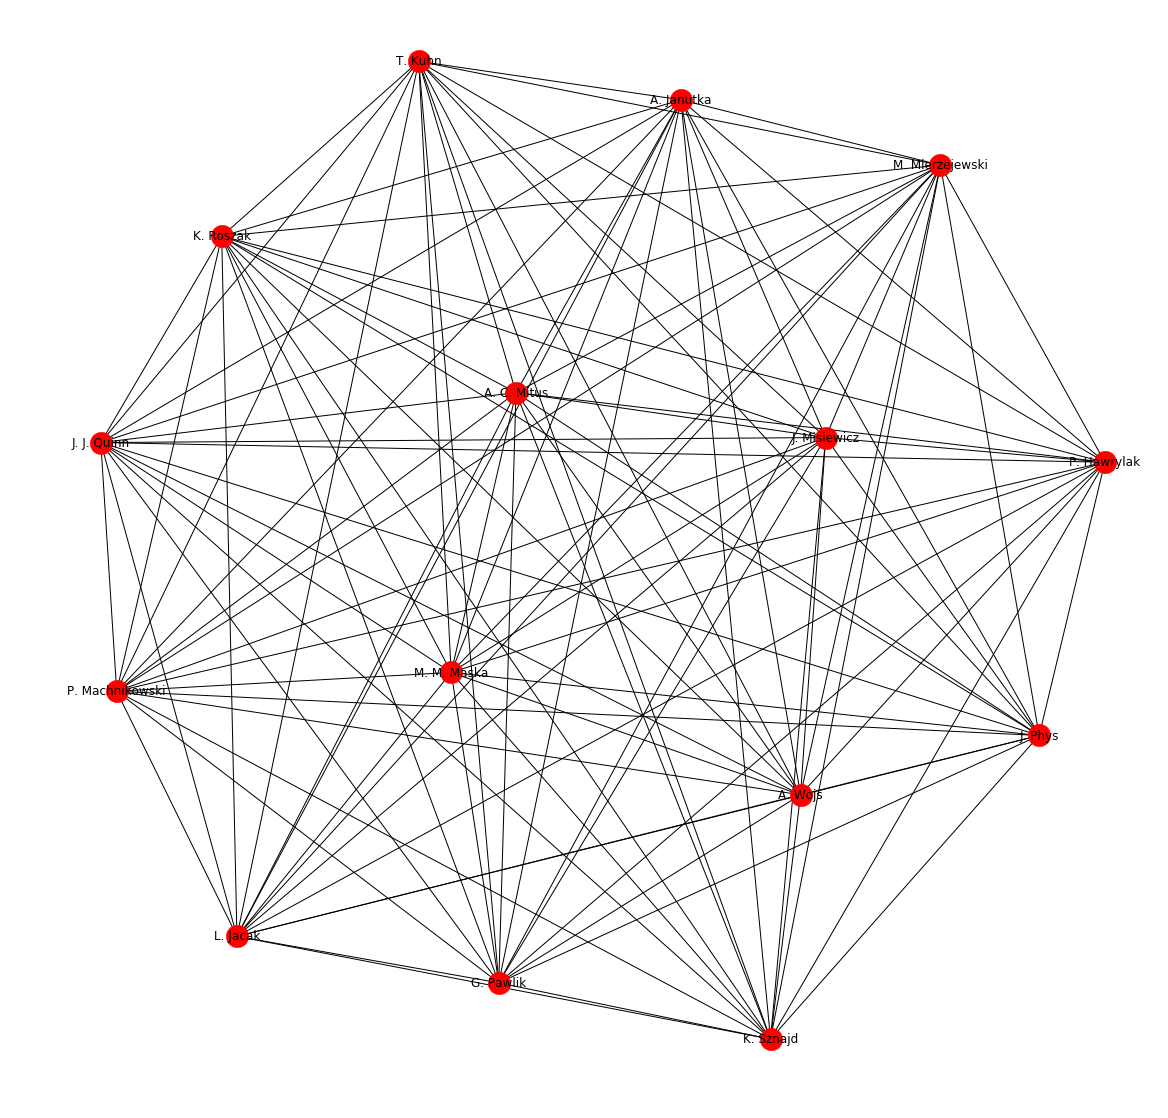

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(111)
nx.draw(researchers_graph, with_labels=True, node_size=500)
plt.show()

# Task 2 scopus

# Task 3

In [11]:
import re
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

# Read the data
alice = open('alice.txt', 'r')
stop = open('stop.txt', 'r')
frequency = {}
file_to_string = alice.read()
stops = stop.read()
words_all = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', file_to_string)
stop_words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', stops)

In [12]:
# Remove stop words
words = list()
for word in words_all:
    if word not in stop_words:
        words.append(word)

In [13]:
# Build dict of words based on frequency
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

In [14]:
# Sort by frequency
sorted_frequencies = sorted(frequency.values(), reverse = True)

In [15]:
# Add ranks
frequencies_with_ranks = {}
unique_frequencies = np.unique(np.array(sorted_frequencies))
reversed_unique_frequencies = unique_frequencies[::-1]
i = 0
for freq in reversed_unique_frequencies:
    i = i+1
    frequencies_with_ranks[freq] = i
    
print(frequencies_with_ranks)

{456: 1, 398: 2, 125: 3, 119: 4, 87: 5, 84: 6, 83: 7, 74: 8, 68: 9, 67: 10, 63: 11, 61: 12, 60: 13, 59: 14, 58: 15, 56: 16, 55: 17, 53: 18, 52: 19, 51: 20, 50: 21, 49: 22, 47: 23, 45: 24, 42: 25, 41: 26, 40: 27, 39: 28, 37: 29, 35: 30, 33: 31, 32: 32, 31: 33, 30: 34, 29: 35, 28: 36, 27: 37, 26: 38, 25: 39, 24: 40, 23: 41, 22: 42, 21: 43, 20: 44, 19: 45, 18: 46, 17: 47, 16: 48, 15: 49, 14: 50, 13: 51, 12: 52, 11: 53, 10: 54, 9: 55, 8: 56, 7: 57, 6: 58, 5: 59, 4: 60, 3: 61, 2: 62, 1: 63}


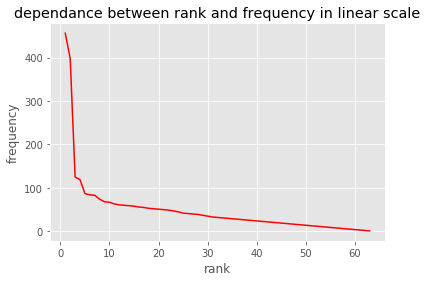

In [16]:
# Plot dependance between rank and frequency
ranks = list(frequencies_with_ranks.values())
frequencies = list(frequencies_with_ranks.keys())
plt.plot(ranks, frequencies, color='r')
plt.title("dependance between rank and frequency in linear scale")
plt.xlabel("rank")
plt.ylabel("frequency")
plt.show()

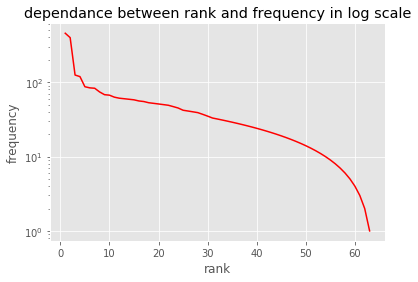

In [17]:
# Plot dependance between rank and frequency
ranks = np.array(list(frequencies_with_ranks.values()))
frequencies = np.array(list(frequencies_with_ranks.keys()))
plt.plot(ranks, frequencies, color='r')
plt.title("dependance between rank and frequency in log scale")
plt.yscale('log')
plt.xlabel("rank")
plt.ylabel("frequency")
plt.show()

In [18]:
# Use powerlaw module to find exponential
data = frequencies
import powerlaw
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit
C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(7.255597765946948, 0.007342920341459393)

## Graph Alice

In [19]:
# Add nodes
alice_graph = nx.Graph()
alice_graph.add_nodes_from(list(set(words)))

In [20]:
# Add edges
for i in range(len(words)-1):
    alice_graph.add_edge(words[i], words[i+1])

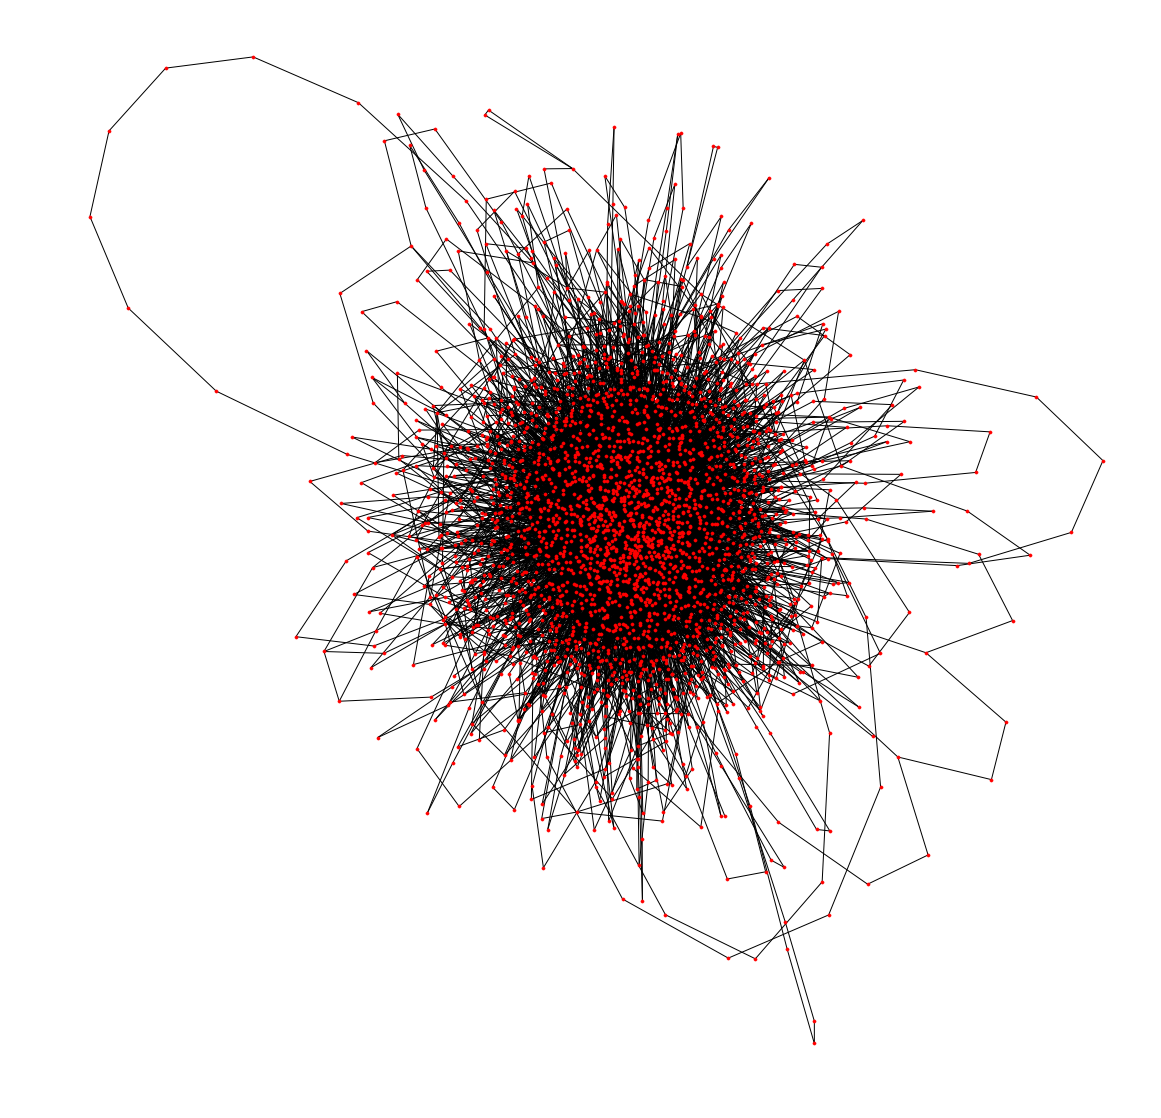

In [21]:
# Plot graph
plt.figure(figsize=(20,20))
plt.subplot(111)
nx.draw(alice_graph, with_labels=False, node_size=10)
plt.show()

In [22]:
# Print nodes with smallest and biggest degree
degrees = [(node, val) for (node, val) in alice_graph.degree()]
sorted_degrees = sorted(degrees, key = lambda x: x[1])
min_degrees = list()
max_degrees = list()
for i in range(0,9):
    min_degrees.append(sorted_degrees[i])
    
for i in range(len(sorted_degrees)-10,len(sorted_degrees)):
    max_degrees.append(sorted_degrees[i])
    
print(min_degrees)
print(max_degrees)

[('banks', 1), ('Either', 1), ('fanned', 1), ('thirteen', 1), ('Fifteenth', 1), ('doorway', 1), ('egg', 1), ('fidgeted', 2), ('ignorant', 2)]
[('And', 104), ('time', 108), ('herself', 120), ('went', 121), ('know', 127), ('like', 129), ('The', 159), ('little', 170), ('Alice', 362), ('said', 367)]


In [23]:
# Sum up nodes with the same degree
amounts = dict()
for deg in sorted_degrees:
    if deg[1] in amounts:
        amounts[deg[1]] += 1
    else:
        amounts[deg[1]] = 1
        
print(amounts)

{1: 7, 2: 1391, 3: 86, 4: 400, 5: 78, 6: 203, 7: 54, 8: 92, 9: 35, 10: 71, 11: 35, 12: 34, 13: 29, 14: 35, 15: 27, 16: 19, 17: 15, 18: 21, 19: 11, 20: 12, 21: 17, 22: 9, 23: 13, 24: 7, 25: 8, 26: 11, 27: 6, 28: 9, 29: 7, 30: 3, 31: 8, 32: 1, 33: 3, 34: 3, 35: 3, 37: 3, 38: 3, 39: 4, 40: 3, 41: 2, 42: 2, 43: 2, 44: 3, 46: 2, 47: 2, 48: 3, 49: 3, 50: 3, 51: 1, 54: 1, 56: 4, 57: 1, 58: 1, 59: 2, 60: 1, 61: 2, 62: 1, 63: 1, 67: 2, 69: 2, 70: 3, 71: 2, 72: 1, 74: 3, 76: 1, 77: 2, 84: 2, 87: 1, 90: 1, 94: 1, 96: 1, 99: 1, 100: 1, 104: 1, 108: 1, 120: 1, 121: 1, 127: 1, 129: 1, 159: 1, 170: 1, 362: 1, 367: 1}


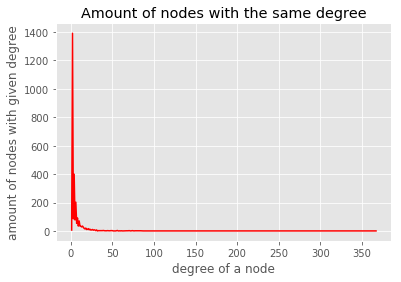

In [24]:
degs = np.array(list(amounts.keys()))
number = np.array(list(amounts.values()))

plt.plot(degs, number, color='r')
plt.title("Amount of nodes with the same degree")
plt.xlabel("degree of a node")
plt.ylabel("amount of nodes with given degree")
plt.show()